<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بازسازی تصویر
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
سلام! در این تمرین قصد داریم کمی با یک تصویر قدیمی بازی کنیم و سعی کنیم این تصویر را کمی بهبود کیفیت دهیم تا ببینیم بدرد امروزی ها میخورد یا نه. البته امروزه تبدیل تصاویر قدیمی به تصاویر جدید معمولا به کمک شبکه های عصبی و ابزار های هوش مصنوعی صورت میگیرد اما در این تمرین سعی میکنیم تلاش خودمان را انجام دهیم.
</font>
</p>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام تمرین را وارد می‌کنیم.
</font>
</p>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصویری که در اختیار شما قرار گرفته است را در این سلول بخوانید. حواستان باشد تصویر باید بصورت رنگی باشد.
</font>
</p>

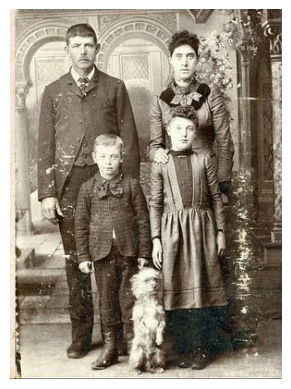

In [6]:
img = cv2.imread('../Data/old_photo.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بهبود روشنایی تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در گام اول در جهت بهبود تصویر، در سلول پایین کنتراست تصویر را به کمک تکنیک همسان سازی هیستوگرام بالا   ببرید. از آنجایی که روی تصویر رنگی کار میکنیم، تصویر را به کانال <code>YCrCb</code> میبریم و فقط قسمت روشنایی را همسان سازی میکنیم.
    </font>
    </p>

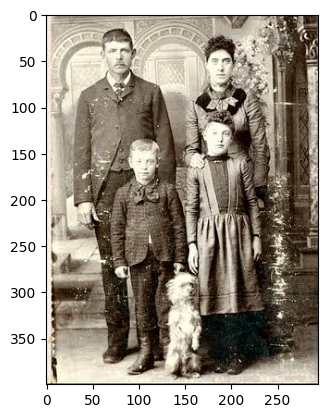

In [10]:
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y_channel, cr, cb = cv2.split(ycrcb)
equalized = cv2.equalizeHist(y_channel)
ycrcb_equalized = cv2.merge((equalized, cr, cb))
equalized = cv2.cvtColor(ycrcb_equalized, cv2.COLOR_YCrCb2BGR)


plt.imshow(cv2.cvtColor(equalized, cv2.COLOR_BGR2RGB))
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تقویت لبه
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در ادامه، در سلول پایین برای بهتر دیده شدن تصویر، لبه ها را تقویت کنید. قبل از انجام این عملیات بهتر است یک فیلتر گاوسی نرم روی تصویر اعمال کنید.
    </font>
    </p>

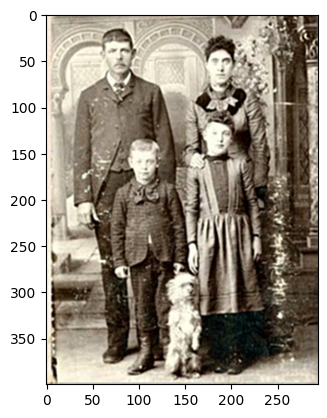

In [18]:
gaussian_blur = cv2.GaussianBlur(equalized, (5, 5),0)
sharpen_kernel = np.array(([0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]))

sharpened = cv2.filter2D(gaussian_blur, -1, sharpen_kernel)


plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اصلاح گاما
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
به کمک تابع نوشته شده، تصویر تا اینجا بدست آمده را تنظیم کنید. این کار باعث افزایش وضوح و روشنایی تصویر و نمایش بهتر جزئیات میشود.
    </font>
    </p>

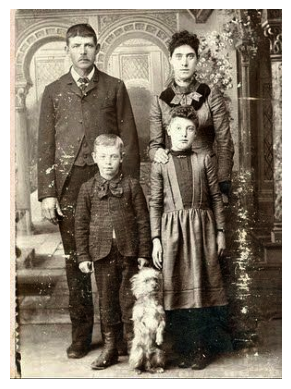

In [19]:
def adjust_gamma(image, gamma=0.8):
    invGamma = 1.0 / gamma
    corrected = np.power(image / 255.0, invGamma) * 255.0
    return corrected.astype(np.uint8)


final = adjust_gamma(img, gamma=0.8)

plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
عملیات مورفولوژیک
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در فصل های آینده با مفهوم مورفولوژی بیشتر آشنا خواهید شد و فصل کاملا اختصاص یافته به این مفهوم از پردازش تصویر خواهید داشت. برای این قسمت فقط در این حد بدانید ما در سلول زیر با استفاده از فرسایش (erosion) قسمت های از دست رفته تصویر مانند روی کت مرد را سعی کردیم پر کنیم.  سلول زیر را اجرا کنید.
    </font>
    </p>

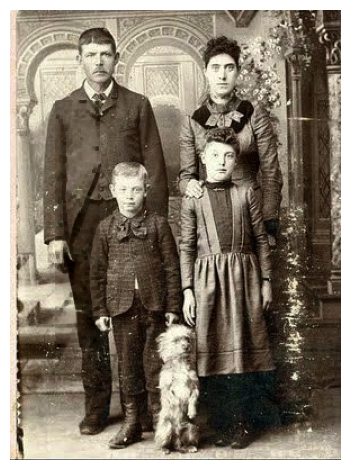

In [20]:
x1, y1 = 40, 80 
x2, y2 = 80, 300  
kernel = np.ones((3, 3), np.uint8)
roi = final[y1:y2, x1:x2] 
eroded_roi = cv2.erode(roi, kernel, iterations=1)  # اعمال erosion
final[y1:y2, x1:x2] = eroded_roi 

plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show() 

In [21]:
from IPython.display import Image 
  
# get the image 
Image(url="../main.png", width=300, height=300) 

<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اگر عملیات را بدرستی انجام داده باشید در نهایت باید تصویری شبیه به تصویر بالا داشته باشیم. البته تصویر بدست آمده تنها کمی بهتر از تصویر اولیه است و امروزه عملیات بازسازی تصاویر قدیمی را با شبکه های عصبی انجام میشود اما به هرحال دانستن راجع به این دنیا و انجام این سوال خیلی هم تجربه بدی محسوب نمیشد. لطفا سلول های زیر را اجرا کنید. تا نمره خود را دریافت کنید.
</font>
</p>

<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [22]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)
            

cv2.imwrite('final.png', final)
file_names = [ 'final.png', 'code.ipynb']
compress(file_names)

File Paths:
['final.png', 'code.ipynb']
